In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip3 install tflearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#importing supporting libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random


#importing sklearn and tensorflow libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
import tflearn.data_utils as du
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.layers.activation import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras import optimizers
import keras.backend as K

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14040195757435074376
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1932778827103495990
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [5]:
#importing data
train_df = pd.read_csv('/content/drive/MyDrive/MLProject/sign_mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/MLProject/sign_mnist_test.csv')

In [6]:
#Separating labels and data
y_train = train_df['label']
y_test = test_df['label']

del train_df['label']
del test_df['label']

X_train = train_df.values
X_test = test_df.values

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequency of each label')

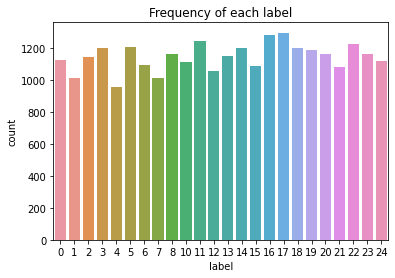

In [7]:
#Checking frequencies of the labels
sns.countplot(y_train)
plt.title("Frequency of each label")

In [8]:
num_class = len(np.unique(y_train))

In [9]:
#Hot-encoding the labels
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27455, 784), (27455, 24), (7172, 784), (7172, 24))

In [11]:
#Normalization
X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
#Reshaping data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

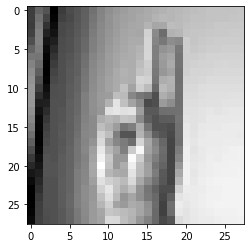

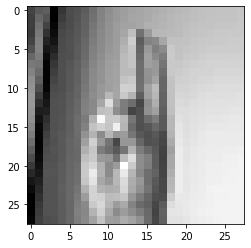

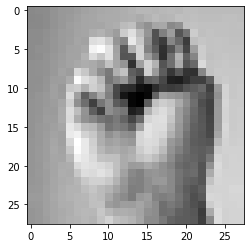

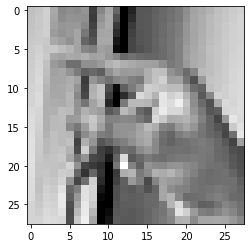

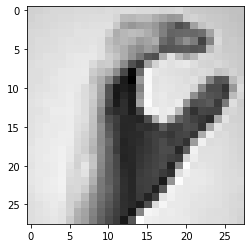

In [13]:
#Checking how the images look like
for i in range(5):
    j = random.randrange(0,len(X_train),1)
    plt.imshow(X_train[j].reshape((28,28)), cmap=plt.get_cmap('gray'))
    plt.show()

In [14]:
param_lst = [0.0001, 0.001, 0.1]
activ_func = ['tanh', 'relu', 'linear']
batch = 68

In [15]:
#Splitting data into training and validations sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((21964, 28, 28, 1), (5491, 28, 28, 1), (21964, 24), (5491, 24))

In [16]:
#Augmenting the data
def create_datagen():
  datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, rotation_range = 10, zoom_range = 0.1)
  return datagen


In [17]:
#3 Layer Model without param

def create_mod_3l(activ):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation = activ, input_shape = (28,28,1), padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Conv2D(32, (3, 3), activation = activ, padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Conv2D(64, (3, 3), activation = activ, padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Flatten())
  model.add(Dropout(0.5))     
  model.add(Dense(100, activation = activ))      
  model.add(Dense(num_class, activation = 'softmax'))
  return model


tanh
Epoch 1/5


<ipython-input-18-540e89e50609>:11: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_train = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch), epochs = 5, verbose = 1, validation_data = (X_val, y_val))


322/323 [============================>.] - ETA: 0s - batch: 160.5000 - size: 68.0000 - loss: 1.8433 - acc: 0.4373

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


323/323 [==============================] - 11s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.8403 - acc: 0.4383 - val_loss: 0.5474 - val_acc: 0.8554
Epoch 2/5
323/323 [==============================] - 6s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.7478 - acc: 0.7612 - val_loss: 0.2276 - val_acc: 0.9486
Epoch 3/5
323/323 [==============================] - 8s 24ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.4969 - acc: 0.8427 - val_loss: 0.1292 - val_acc: 0.9772
Epoch 4/5
323/323 [==============================] - 6s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.3600 - acc: 0.8898 - val_loss: 0.0761 - val_acc: 0.9922
Epoch 5/5
323/323 [==============================] - 6s 19ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.2845 - acc: 0.9147 - val_loss: 0.0435 - val_acc: 0.9973


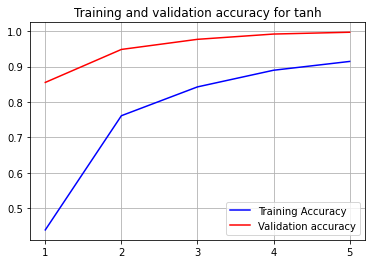

relu
Epoch 1/5
323/323 [==============================] - 7s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 2.3300 - acc: 0.2956 - val_loss: 0.7691 - val_acc: 0.7751
Epoch 2/5
323/323 [==============================] - 6s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.0013 - acc: 0.6699 - val_loss: 0.2908 - val_acc: 0.9292
Epoch 3/5
323/323 [==============================] - 6s 19ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.6348 - acc: 0.7881 - val_loss: 0.1709 - val_acc: 0.9537
Epoch 4/5
323/323 [==============================] - 10s 31ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.4635 - acc: 0.8444 - val_loss: 0.0889 - val_acc: 0.9811
Epoch 5/5
323/323 [==============================] - 6s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.3597 - acc: 0.8827 - val_loss: 0.0667 - val_acc: 0.9867


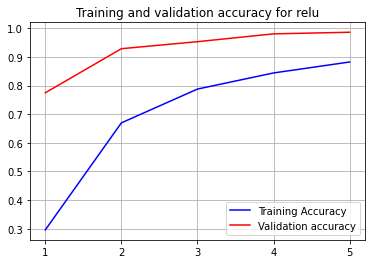

linear
Epoch 1/5
323/323 [==============================] - 8s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.8160 - acc: 0.4431 - val_loss: 0.4441 - val_acc: 0.8614
Epoch 2/5
323/323 [==============================] - 8s 24ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.7763 - acc: 0.7441 - val_loss: 0.2332 - val_acc: 0.9324
Epoch 3/5
323/323 [==============================] - 6s 19ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.5360 - acc: 0.8197 - val_loss: 0.1259 - val_acc: 0.9628
Epoch 4/5
323/323 [==============================] - 8s 24ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.4045 - acc: 0.8646 - val_loss: 0.0684 - val_acc: 0.9889
Epoch 5/5
323/323 [==============================] - 6s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.3348 - acc: 0.8864 - val_loss: 0.0545 - val_acc: 0.9894


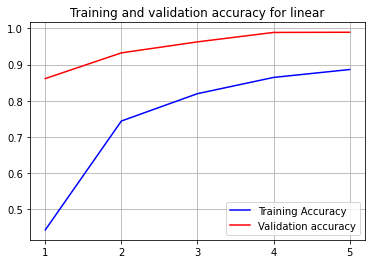

[(0.9972682595252991, 'tanh'), (0.9867055416107178, 'relu'), (0.9894372820854187, 'linear')]


In [18]:
#Running the 3 Layer Model without param

lst = []

for i, mod in enumerate(activ_func):
  print(mod)
  model = create_mod_3l(mod)
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])
  datagen = create_datagen()
  datagen.fit(X_train)
  model_train = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch), epochs = 5, verbose = 1, validation_data = (X_val, y_val))
  model.save("model_train.h5py") 

  accuracy = model_train.history['acc']
  val_accuracy = model_train.history['val_acc']
  epochs = list(range(len(accuracy)))
  lst.append((val_accuracy[-1], mod))

  plt.plot(epochs, accuracy, color = 'blue', label = 'Training Accuracy')
  plt.plot(epochs, val_accuracy, color = 'red', label = 'Validation accuracy')
  plt.title('Training and validation accuracy for ' + mod)
  plt.xticks([0, 1, 2, 3, 4], ['1', '2', '3', '4', '5'])
  plt.grid(True)
  plt.legend()
  plt.show()

print(lst)

In [19]:
#3 Layer Model with l2

def create_mod_3l_l2(activ, param):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation = activ, input_shape = (28,28,1), padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Conv2D(32, (3, 3), activation = activ, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2( l=param)))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Conv2D(64, (3, 3), activation = activ, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2( l=param)))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Flatten())
  model.add(Dropout(0.5))     
  model.add(Dense(100, activation = activ))        
  model.add(Dense(num_class, activation = 'softmax'))
  return model


tanh 0.0001


<ipython-input-20-23ff57bc3d95>:12: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_train = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch), epochs = 5, verbose = 1, validation_data = (X_val, y_val))


Epoch 1/5
323/323 [==============================] - 9s 24ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.7925 - acc: 0.4603 - val_loss: 0.5301 - val_acc: 0.8691
Epoch 2/5
323/323 [==============================] - 6s 19ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.7629 - acc: 0.7613 - val_loss: 0.2326 - val_acc: 0.9594
Epoch 3/5
323/323 [==============================] - 7s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.5204 - acc: 0.8388 - val_loss: 0.1460 - val_acc: 0.9818
Epoch 4/5
323/323 [==============================] - 7s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.3942 - acc: 0.8833 - val_loss: 0.0961 - val_acc: 0.9878
Epoch 5/5
323/323 [==============================] - 6s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.3031 - acc: 0.9158 - val_loss: 0.0706 - val_acc: 0.9958


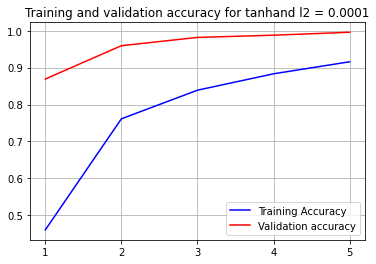

tanh 0.001
Epoch 1/5
323/323 [==============================] - 8s 24ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.9440 - acc: 0.4358 - val_loss: 0.6228 - val_acc: 0.8696
Epoch 2/5
323/323 [==============================] - 6s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.8949 - acc: 0.7496 - val_loss: 0.3693 - val_acc: 0.9492
Epoch 3/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.6544 - acc: 0.8260 - val_loss: 0.2477 - val_acc: 0.9798
Epoch 4/5
323/323 [==============================] - 7s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.5144 - acc: 0.8757 - val_loss: 0.1931 - val_acc: 0.9907
Epoch 5/5
323/323 [==============================] - 6s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.4320 - acc: 0.8994 - val_loss: 0.1611 - val_acc: 0.9960


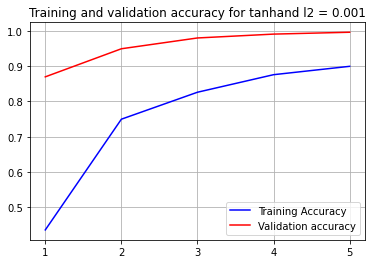

tanh 0.1
Epoch 1/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 3.2629 - acc: 0.2527 - val_loss: 1.6273 - val_acc: 0.6024
Epoch 2/5
323/323 [==============================] - 7s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.7948 - acc: 0.5244 - val_loss: 1.0804 - val_acc: 0.7995
Epoch 3/5
323/323 [==============================] - 7s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.4122 - acc: 0.6510 - val_loss: 0.8353 - val_acc: 0.8609
Epoch 4/5
323/323 [==============================] - 6s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.2144 - acc: 0.7078 - val_loss: 0.6796 - val_acc: 0.9095
Epoch 5/5
323/323 [==============================] - 6s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.1012 - acc: 0.7360 - val_loss: 0.6081 - val_acc: 0.9281


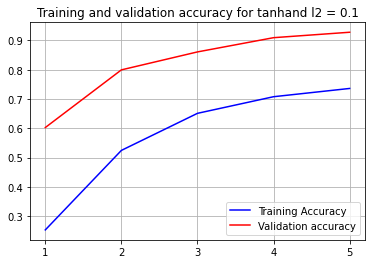

relu 0.0001
Epoch 1/5
323/323 [==============================] - 7s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 2.4409 - acc: 0.2608 - val_loss: 0.8600 - val_acc: 0.7268
Epoch 2/5
323/323 [==============================] - 7s 22ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.0201 - acc: 0.6668 - val_loss: 0.4029 - val_acc: 0.8782
Epoch 3/5
323/323 [==============================] - 7s 22ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.6595 - acc: 0.7817 - val_loss: 0.1914 - val_acc: 0.9537
Epoch 4/5
323/323 [==============================] - 6s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.4873 - acc: 0.8404 - val_loss: 0.1649 - val_acc: 0.9510
Epoch 5/5
323/323 [==============================] - 6s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.3836 - acc: 0.8792 - val_loss: 0.1070 - val_acc: 0.9816


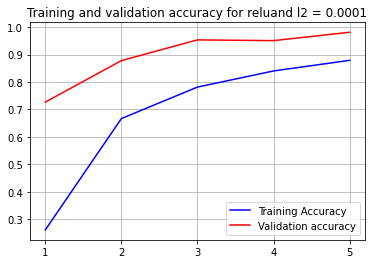

relu 0.001
Epoch 1/5
323/323 [==============================] - 8s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 2.2809 - acc: 0.3188 - val_loss: 0.8293 - val_acc: 0.7842
Epoch 2/5
323/323 [==============================] - 7s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.0208 - acc: 0.6935 - val_loss: 0.4497 - val_acc: 0.8871
Epoch 3/5
323/323 [==============================] - 8s 24ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.7227 - acc: 0.7919 - val_loss: 0.3006 - val_acc: 0.9510
Epoch 4/5
323/323 [==============================] - 6s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.5885 - acc: 0.8411 - val_loss: 0.2092 - val_acc: 0.9825
Epoch 5/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.4992 - acc: 0.8707 - val_loss: 0.1970 - val_acc: 0.9836


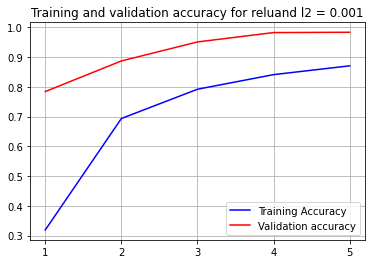

relu 0.1
Epoch 1/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 3.7192 - acc: 0.0799 - val_loss: 2.7688 - val_acc: 0.2122
Epoch 2/5
323/323 [==============================] - 6s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 2.5924 - acc: 0.2534 - val_loss: 1.9715 - val_acc: 0.4451
Epoch 3/5
323/323 [==============================] - 7s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 2.1882 - acc: 0.3740 - val_loss: 1.5723 - val_acc: 0.6130
Epoch 4/5
323/323 [==============================] - 8s 24ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.9093 - acc: 0.4639 - val_loss: 1.2850 - val_acc: 0.7057
Epoch 5/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.7023 - acc: 0.5307 - val_loss: 1.0819 - val_acc: 0.7592


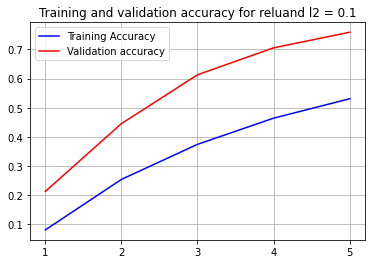

linear 0.0001
Epoch 1/5
323/323 [==============================] - 8s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.9050 - acc: 0.4195 - val_loss: 0.5116 - val_acc: 0.8496
Epoch 2/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.8185 - acc: 0.7350 - val_loss: 0.2490 - val_acc: 0.9332
Epoch 3/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.5580 - acc: 0.8169 - val_loss: 0.1384 - val_acc: 0.9712
Epoch 4/5
323/323 [==============================] - 13s 41ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.4299 - acc: 0.8605 - val_loss: 0.0929 - val_acc: 0.9851
Epoch 5/5
323/323 [==============================] - 14s 42ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.3525 - acc: 0.8871 - val_loss: 0.0805 - val_acc: 0.9874


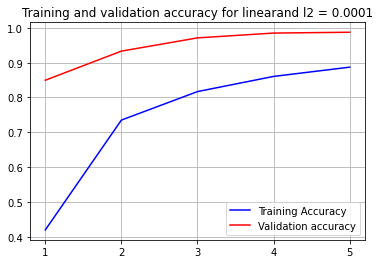

linear 0.001
Epoch 1/5
323/323 [==============================] - 7s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.8554 - acc: 0.4536 - val_loss: 0.6045 - val_acc: 0.8427
Epoch 2/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.8740 - acc: 0.7446 - val_loss: 0.3619 - val_acc: 0.9290
Epoch 3/5
323/323 [==============================] - 8s 24ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.6487 - acc: 0.8194 - val_loss: 0.2485 - val_acc: 0.9694
Epoch 4/5
323/323 [==============================] - 7s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.5430 - acc: 0.8585 - val_loss: 0.2170 - val_acc: 0.9738
Epoch 5/5
323/323 [==============================] - 7s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.4564 - acc: 0.8864 - val_loss: 0.1756 - val_acc: 0.9882


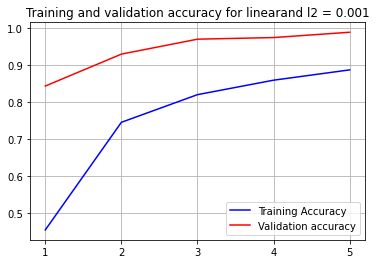

linear 0.1
Epoch 1/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 3.2598 - acc: 0.2584 - val_loss: 1.5250 - val_acc: 0.6196
Epoch 2/5
323/323 [==============================] - 6s 20ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.7795 - acc: 0.5348 - val_loss: 1.0914 - val_acc: 0.7636
Epoch 3/5
323/323 [==============================] - 7s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.4349 - acc: 0.6415 - val_loss: 0.8049 - val_acc: 0.8692
Epoch 4/5
323/323 [==============================] - 7s 22ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.2480 - acc: 0.6955 - val_loss: 0.7170 - val_acc: 0.8807
Epoch 5/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.1374 - acc: 0.7203 - val_loss: 0.6843 - val_acc: 0.8831


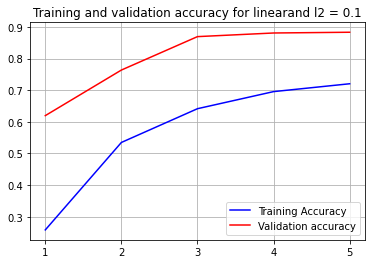

[(0.9958113431930542, 'tanh'), (0.995993435382843, 'tanh'), (0.9280641078948975, 'tanh'), (0.9816062450408936, 'relu'), (0.9836095571517944, 'relu'), (0.7592424154281616, 'relu'), (0.9874339699745178, 'linear'), (0.9881624579429626, 'linear'), (0.8830813765525818, 'linear')]


In [20]:
#Running the 3 Layer Model without param

lst = []

for mod in (activ_func):
  for param in (param_lst):
    print(mod, param)
    model = create_mod_3l_l2(mod, param)
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])
    datagen = create_datagen()
    datagen.fit(X_train)
    model_train = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch), epochs = 5, verbose = 1, validation_data = (X_val, y_val))
    model.save("model_train.h5py") 

    accuracy = model_train.history['acc']
    val_accuracy = model_train.history['val_acc']
    epochs = list(range(len(accuracy)))
    lst.append((val_accuracy[-1], mod))

    plt.plot(epochs, accuracy, color = 'blue', label = 'Training Accuracy')
    plt.plot(epochs, val_accuracy, color = 'red', label = 'Validation accuracy')
    plt.title('Training and validation accuracy for ' + mod + 'and l2 = ' + str(param))
    plt.xticks([0, 1, 2, 3, 4], ['1', '2', '3', '4', '5'])
    plt.grid(True)
    plt.legend()
    plt.show()

print(lst)

In [21]:
#5 Layer Model without l2

def create_model_5l(activ):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation = activ, input_shape = (28,28,1), padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Conv2D(32, (3, 3), activation = activ, padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Conv2D(64, (3, 3), activation = activ, padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Conv2D(64, (3, 3), activation = activ, padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Conv2D(128, (3, 3), activation = activ, padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Conv2D(128, (3, 3), activation = activ, padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Flatten())
  model.add(Dropout(0.5))     
  model.add(Dense(100, activation = activ))         
  model.add(Dense(num_class, activation = 'softmax'))
  return model

tanh


<ipython-input-22-7e288ce39a00>:11: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_train = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch), epochs = 5, verbose = 1, validation_data = (X_val, y_val))


Epoch 1/5
321/323 [============================>.] - ETA: 0s - batch: 160.0000 - size: 68.0000 - loss: 1.9027 - acc: 0.3862

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


323/323 [==============================] - 9s 24ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.8957 - acc: 0.3885 - val_loss: 0.5274 - val_acc: 0.8277
Epoch 2/5
323/323 [==============================] - 8s 25ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.5333 - acc: 0.8231 - val_loss: 0.1466 - val_acc: 0.9563
Epoch 3/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.2544 - acc: 0.9204 - val_loss: 0.0439 - val_acc: 0.9885
Epoch 4/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.1573 - acc: 0.9496 - val_loss: 0.0584 - val_acc: 0.9792
Epoch 5/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.1089 - acc: 0.9659 - val_loss: 0.0138 - val_acc: 0.9965


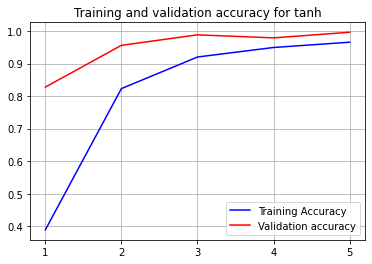

relu
Epoch 1/5
323/323 [==============================] - 19s 50ms/step - batch: 161.0000 - size: 68.0000 - loss: 3.0331 - acc: 0.0758 - val_loss: 2.5501 - val_acc: 0.1674
Epoch 2/5
323/323 [==============================] - 12s 37ms/step - batch: 161.0000 - size: 68.0000 - loss: 2.3008 - acc: 0.2295 - val_loss: 1.6005 - val_acc: 0.3917
Epoch 3/5
323/323 [==============================] - 9s 29ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.5930 - acc: 0.4181 - val_loss: 0.9783 - val_acc: 0.6656
Epoch 4/5
323/323 [==============================] - 8s 24ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.1536 - acc: 0.5768 - val_loss: 0.5685 - val_acc: 0.8002
Epoch 5/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.8067 - acc: 0.7007 - val_loss: 0.3458 - val_acc: 0.8605


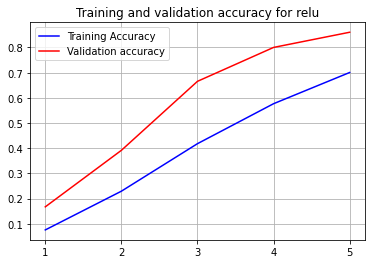

linear
Epoch 1/5
323/323 [==============================] - 8s 22ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.8545 - acc: 0.3969 - val_loss: 0.5127 - val_acc: 0.8152
Epoch 2/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.5172 - acc: 0.8135 - val_loss: 0.0967 - val_acc: 0.9650
Epoch 3/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.2499 - acc: 0.9143 - val_loss: 0.0543 - val_acc: 0.9789
Epoch 4/5
323/323 [==============================] - 8s 25ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.1654 - acc: 0.9437 - val_loss: 0.0266 - val_acc: 0.9911
Epoch 5/5
323/323 [==============================] - 7s 22ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.1179 - acc: 0.9616 - val_loss: 0.0103 - val_acc: 0.9973


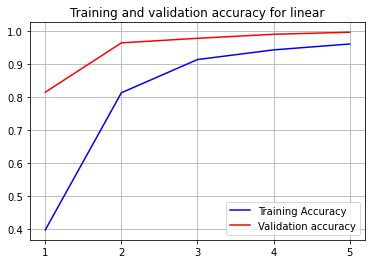

[(0.9965397715568542, 'tanh'), (0.8604990243911743, 'relu'), (0.9972682595252991, 'linear')]


In [22]:
#Running the 5 Layer Model without l2

lst = []

for mod in (activ_func):
  print(mod)
  model = create_model_5l(mod)
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])
  datagen = create_datagen()
  datagen.fit(X_train)
  model_train = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch), epochs = 5, verbose = 1, validation_data = (X_val, y_val))
  model.save("model_train.h5py") 

  accuracy = model_train.history['acc']
  val_accuracy = model_train.history['val_acc']
  epochs = list(range(len(accuracy)))
  lst.append((val_accuracy[-1], mod))

  plt.plot(epochs, accuracy, color = 'blue', label = 'Training Accuracy')
  plt.plot(epochs, val_accuracy, color = 'red', label = 'Validation accuracy')
  plt.title('Training and validation accuracy for ' + mod)
  plt.xticks([0, 1, 2, 3, 4], ['1', '2', '3', '4', '5'])
  plt.grid(True)
  plt.legend()
  plt.show()

print(lst)

In [23]:
#5 Layer Model with l2
#Changed params, because based on 3 layer model l2 of 1 and 10 had too high loss and too low accuracy
l2 = [0.0001, 0.001, 0.01, 0.1]
def create_model_5l_l2(activ, l2):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation = activ, input_shape = (28,28,1), padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Conv2D(32, (3, 3), activation = activ, padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Conv2D(64, (3, 3), activation = activ, padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Conv2D(64, (3, 3), activation = activ, padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Conv2D(128, (3, 3), activation = activ, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2( l=param)))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Conv2D(128, (3, 3), activation = activ, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2( l=param)))
  model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
  model.add(Flatten())
  model.add(Dropout(0.5))   
  model.add(Dense(100, activation = activ))           
  model.add(Dense(num_class, activation = 'softmax'))
  return model

tanh 0.0001


<ipython-input-24-5822b3c5d21a>:12: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_train = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch), epochs = 5, verbose = 1, validation_data = (X_val, y_val))


Epoch 1/5
323/323 [==============================] - ETA: 0s - batch: 161.0000 - size: 68.0000 - loss: 1.8957 - acc: 0.3932

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


323/323 [==============================] - 8s 22ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.8957 - acc: 0.3932 - val_loss: 0.6092 - val_acc: 0.7986
Epoch 2/5
323/323 [==============================] - 9s 28ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.5729 - acc: 0.8158 - val_loss: 0.2174 - val_acc: 0.9384
Epoch 3/5
323/323 [==============================] - 8s 26ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.2899 - acc: 0.9165 - val_loss: 0.0828 - val_acc: 0.9867
Epoch 4/5
323/323 [==============================] - 7s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.1799 - acc: 0.9527 - val_loss: 0.0740 - val_acc: 0.9867
Epoch 5/5
323/323 [==============================] - 8s 24ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.1382 - acc: 0.9662 - val_loss: 0.0484 - val_acc: 0.9960


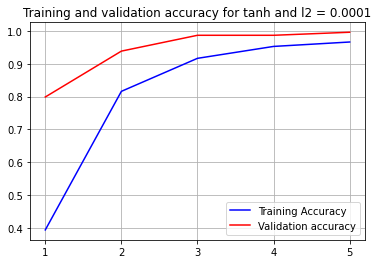

tanh 0.001
Epoch 1/5
323/323 [==============================] - 8s 22ms/step - batch: 161.0000 - size: 68.0000 - loss: 2.0938 - acc: 0.3462 - val_loss: 0.7198 - val_acc: 0.7997
Epoch 2/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.6908 - acc: 0.8050 - val_loss: 0.2816 - val_acc: 0.9536
Epoch 3/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.3955 - acc: 0.9132 - val_loss: 0.1945 - val_acc: 0.9801
Epoch 4/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.2770 - acc: 0.9519 - val_loss: 0.1626 - val_acc: 0.9849
Epoch 5/5
323/323 [==============================] - 8s 25ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.2246 - acc: 0.9670 - val_loss: 0.1357 - val_acc: 0.9934


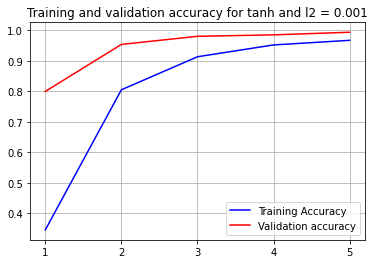

tanh 0.1
Epoch 1/5
323/323 [==============================] - 9s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 4.1755 - acc: 0.0452 - val_loss: 3.1775 - val_acc: 0.0428
Epoch 2/5
323/323 [==============================] - 7s 22ms/step - batch: 161.0000 - size: 68.0000 - loss: 3.1772 - acc: 0.0453 - val_loss: 3.1770 - val_acc: 0.0428
Epoch 3/5
323/323 [==============================] - 8s 26ms/step - batch: 161.0000 - size: 68.0000 - loss: 3.1770 - acc: 0.0468 - val_loss: 3.1784 - val_acc: 0.0410
Epoch 4/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 3.1771 - acc: 0.0465 - val_loss: 3.1773 - val_acc: 0.0428
Epoch 5/5
323/323 [==============================] - 8s 26ms/step - batch: 161.0000 - size: 68.0000 - loss: 3.1773 - acc: 0.0478 - val_loss: 3.1784 - val_acc: 0.0453


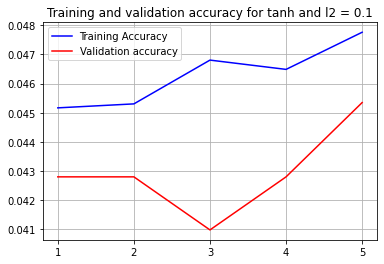

relu 0.0001
Epoch 1/5
323/323 [==============================] - 8s 22ms/step - batch: 161.0000 - size: 68.0000 - loss: 2.8417 - acc: 0.1014 - val_loss: 2.4676 - val_acc: 0.1887
Epoch 2/5
323/323 [==============================] - 7s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 2.1535 - acc: 0.2530 - val_loss: 1.4579 - val_acc: 0.4442
Epoch 3/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.5230 - acc: 0.4333 - val_loss: 0.8889 - val_acc: 0.6576
Epoch 4/5
323/323 [==============================] - 7s 22ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.1121 - acc: 0.5816 - val_loss: 0.5264 - val_acc: 0.8261
Epoch 5/5
323/323 [==============================] - 8s 25ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.8236 - acc: 0.6937 - val_loss: 0.4039 - val_acc: 0.8549


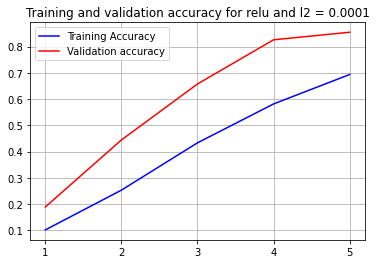

relu 0.001
Epoch 1/5
323/323 [==============================] - 9s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 3.0110 - acc: 0.0758 - val_loss: 2.4892 - val_acc: 0.1446
Epoch 2/5
323/323 [==============================] - 7s 22ms/step - batch: 161.0000 - size: 68.0000 - loss: 2.3838 - acc: 0.1908 - val_loss: 1.7852 - val_acc: 0.3542
Epoch 3/5
323/323 [==============================] - 7s 22ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.6608 - acc: 0.3944 - val_loss: 1.1398 - val_acc: 0.5993
Epoch 4/5
323/323 [==============================] - 7s 22ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.2390 - acc: 0.5526 - val_loss: 0.6497 - val_acc: 0.7742
Epoch 5/5
323/323 [==============================] - 8s 25ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.9510 - acc: 0.6667 - val_loss: 0.5093 - val_acc: 0.8434


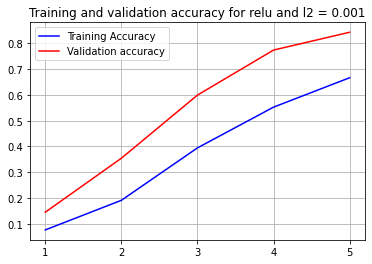

relu 0.1
Epoch 1/5
323/323 [==============================] - 9s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 4.1770 - acc: 0.0469 - val_loss: 3.1761 - val_acc: 0.0453
Epoch 2/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 3.1760 - acc: 0.0480 - val_loss: 3.1763 - val_acc: 0.0428
Epoch 3/5
323/323 [==============================] - 7s 22ms/step - batch: 161.0000 - size: 68.0000 - loss: 3.1761 - acc: 0.0477 - val_loss: 3.1761 - val_acc: 0.0428
Epoch 4/5
323/323 [==============================] - 8s 25ms/step - batch: 161.0000 - size: 68.0000 - loss: 3.1760 - acc: 0.0482 - val_loss: 3.1761 - val_acc: 0.0428
Epoch 5/5
323/323 [==============================] - 8s 26ms/step - batch: 161.0000 - size: 68.0000 - loss: 3.1759 - acc: 0.0471 - val_loss: 3.1763 - val_acc: 0.0428


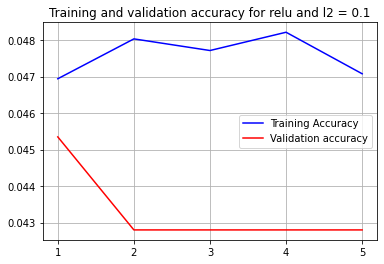

linear 0.0001
Epoch 1/5
323/323 [==============================] - 9s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.9652 - acc: 0.3741 - val_loss: 0.5422 - val_acc: 0.8168
Epoch 2/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.5559 - acc: 0.8127 - val_loss: 0.2525 - val_acc: 0.9182
Epoch 3/5
323/323 [==============================] - 7s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.2936 - acc: 0.9066 - val_loss: 0.0922 - val_acc: 0.9771
Epoch 4/5
323/323 [==============================] - 8s 24ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.1961 - acc: 0.9422 - val_loss: 0.0633 - val_acc: 0.9863
Epoch 5/5
323/323 [==============================] - 8s 26ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.1413 - acc: 0.9623 - val_loss: 0.0530 - val_acc: 0.9913


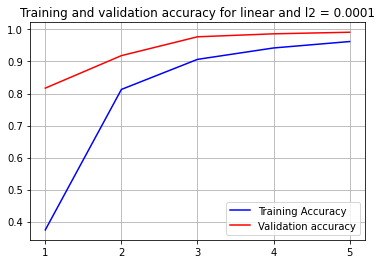

linear 0.001
Epoch 1/5
323/323 [==============================] - 9s 24ms/step - batch: 161.0000 - size: 68.0000 - loss: 2.0409 - acc: 0.3654 - val_loss: 0.6925 - val_acc: 0.7638
Epoch 2/5
323/323 [==============================] - 8s 24ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.6640 - acc: 0.7987 - val_loss: 0.2580 - val_acc: 0.9561
Epoch 3/5
323/323 [==============================] - 8s 26ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.3959 - acc: 0.9062 - val_loss: 0.2032 - val_acc: 0.9714
Epoch 4/5
323/323 [==============================] - 8s 26ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.2950 - acc: 0.9420 - val_loss: 0.1528 - val_acc: 0.9907
Epoch 5/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.2505 - acc: 0.9568 - val_loss: 0.1409 - val_acc: 0.9900


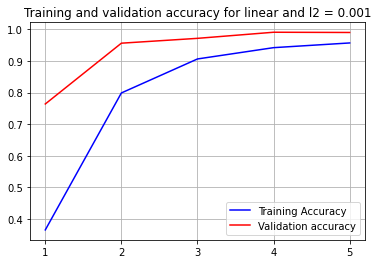

linear 0.1
Epoch 1/5
323/323 [==============================] - 9s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 4.1832 - acc: 0.0496 - val_loss: 3.1773 - val_acc: 0.0453
Epoch 2/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 3.1187 - acc: 0.0670 - val_loss: 2.7482 - val_acc: 0.1865
Epoch 3/5
323/323 [==============================] - 7s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.9641 - acc: 0.4525 - val_loss: 1.1709 - val_acc: 0.6771
Epoch 4/5
323/323 [==============================] - 9s 27ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.1392 - acc: 0.7397 - val_loss: 0.7285 - val_acc: 0.8702
Epoch 5/5
323/323 [==============================] - 7s 22ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.8513 - acc: 0.8317 - val_loss: 0.5586 - val_acc: 0.9366


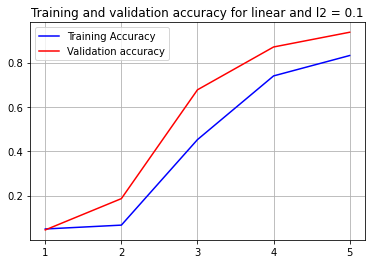

[(0.995993435382843, 'tanh'), (0.9934438467025757, 'tanh'), (0.045346930623054504, 'tanh'), (0.8548533916473389, 'relu'), (0.8433800935745239, 'relu'), (0.042797304689884186, 'relu'), (0.991258442401886, 'linear'), (0.9899836182594299, 'linear'), (0.9366235733032227, 'linear')]


In [24]:
#Running the 5 Layer Model without param

lst = []

for mod in (activ_func):
  for param in (param_lst):
    print(mod, param)
    model = create_model_5l_l2(mod, param)
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])
    datagen = create_datagen()
    datagen.fit(X_train)
    model_train = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch), epochs = 5, verbose = 1, validation_data = (X_val, y_val))
    model.save("model_train.h5py") 

    accuracy = model_train.history['acc']
    val_accuracy = model_train.history['val_acc']
    epochs = list(range(len(accuracy)))
    lst.append((val_accuracy[-1], mod))

    plt.plot(epochs, accuracy, color = 'blue', label = 'Training Accuracy')
    plt.plot(epochs, val_accuracy, color = 'red', label = 'Validation accuracy')
    plt.title('Training and validation accuracy for ' + mod + ' and l2 = ' + str(param))
    plt.xticks([0, 1, 2, 3, 4], ['1', '2', '3', '4', '5'])
    plt.grid(True)
    plt.legend()
    plt.show()

print(lst)

In [26]:
#Leak ReLu 

def create_mod_leaky(param):
    print(param)
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=(28,28,1),padding='same'))
    model.add(LeakyReLU(alpha=param))
    model.add(MaxPooling2D((2, 2),padding='same'))
    model.add(Conv2D(64, (3, 3), activation='tanh',padding='same'))
    model.add(LeakyReLU(alpha=param))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Conv2D(128, (3, 3), activation='tanh',padding='same'))
    model.add(LeakyReLU(alpha=param))                  
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Flatten())
    model.add(LeakyReLU(alpha=param))  
    model.add(Dropout(0.5))   
    model.add(Dense(100, activation='tanh'))                 
    model.add(Dense(num_class, activation='softmax'))
    return model

0.0001
0.0001


<ipython-input-27-dcbf16bf3073>:11: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_train = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch), epochs = 5, verbose = 1, validation_data = (X_val, y_val))


Epoch 1/5
323/323 [==============================] - 9s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 2.0299 - acc: 0.3786 - val_loss: 0.5753 - val_acc: 0.8583
Epoch 2/5
323/323 [==============================] - 8s 25ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.7252 - acc: 0.7713 - val_loss: 0.2318 - val_acc: 0.9643
Epoch 3/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.4391 - acc: 0.8633 - val_loss: 0.1168 - val_acc: 0.9807
Epoch 4/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.3014 - acc: 0.9092 - val_loss: 0.0565 - val_acc: 0.9929
Epoch 5/5
323/323 [==============================] - 8s 26ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.2326 - acc: 0.9276 - val_loss: 0.0340 - val_acc: 0.9962


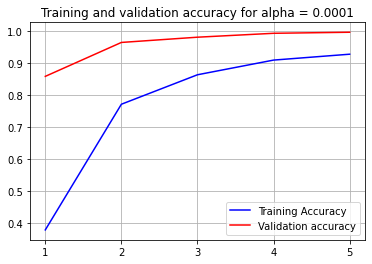

0.001
0.001
Epoch 1/5
323/323 [==============================] - 9s 22ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.8691 - acc: 0.4336 - val_loss: 0.5075 - val_acc: 0.8800
Epoch 2/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.6420 - acc: 0.7964 - val_loss: 0.2250 - val_acc: 0.9394
Epoch 3/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.3909 - acc: 0.8786 - val_loss: 0.0914 - val_acc: 0.9840
Epoch 4/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.2547 - acc: 0.9238 - val_loss: 0.0444 - val_acc: 0.9967
Epoch 5/5
323/323 [==============================] - 8s 25ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.1872 - acc: 0.9441 - val_loss: 0.0275 - val_acc: 0.9987


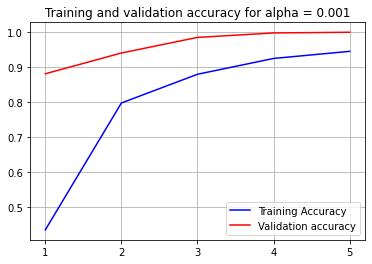

0.1
0.1
Epoch 1/5
323/323 [==============================] - 9s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 1.8796 - acc: 0.4227 - val_loss: 0.5735 - val_acc: 0.8437
Epoch 2/5
323/323 [==============================] - 7s 21ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.6628 - acc: 0.7938 - val_loss: 0.1851 - val_acc: 0.9674
Epoch 3/5
323/323 [==============================] - 7s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.3749 - acc: 0.8849 - val_loss: 0.0773 - val_acc: 0.9911
Epoch 4/5
323/323 [==============================] - 7s 23ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.2556 - acc: 0.9261 - val_loss: 0.0580 - val_acc: 0.9896
Epoch 5/5
323/323 [==============================] - 8s 25ms/step - batch: 161.0000 - size: 68.0000 - loss: 0.1865 - acc: 0.9467 - val_loss: 0.0240 - val_acc: 0.9982


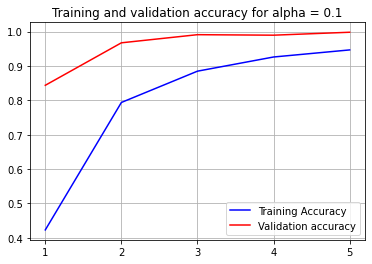

[(0.9961755871772766, 'linear'), (0.998725175857544, 'linear'), (0.9981788396835327, 'linear')]


In [27]:
#Running the Leaky ReLU Model 

lst = []

for param in (param_lst):
  print(param)
  model = create_mod_leaky(param)
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])
  datagen = create_datagen()
  datagen.fit(X_train)
  model_train = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch), epochs = 5, verbose = 1, validation_data = (X_val, y_val))
  model.save("model_train.h5py") 

  accuracy = model_train.history['acc']
  val_accuracy = model_train.history['val_acc']
  epochs = list(range(len(accuracy)))
  lst.append((val_accuracy[-1], mod))

  plt.plot(epochs, accuracy, color = 'blue', label = 'Training Accuracy')
  plt.plot(epochs, val_accuracy, color = 'red', label = 'Validation accuracy')
  plt.title('Training and validation accuracy for alpha = ' + str(param))
  plt.xticks([0, 1, 2, 3, 4], ['1', '2', '3', '4', '5'])
  plt.grid(True)
  plt.legend()
  plt.show()

print(lst)

In [28]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [29]:
targets = ["Class {}".format(i) for i in range(num_class)]
print(classification_report(y_true, y_pred, target_names = targets))

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       0.93      1.00      0.96       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      0.95      0.97       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
     Class 9       1.00      1.00      1.00       331
    Class 10       1.00      1.00      1.00       209
    Class 11       1.00      1.00      1.00       394
    Class 12       1.00      0.99      0.99       291
    Class 13       1.00      1.00      1.00       246
    Class 14       1.00      1.00      1.00       347
    Class 15       0.97      1.00      0.98       164
    Class 16       1.00      1.00      1.00       144
    Class 17       1.00    

Text(0.5, 1.0, 'Accuracy Score: 0.9899609592861126')

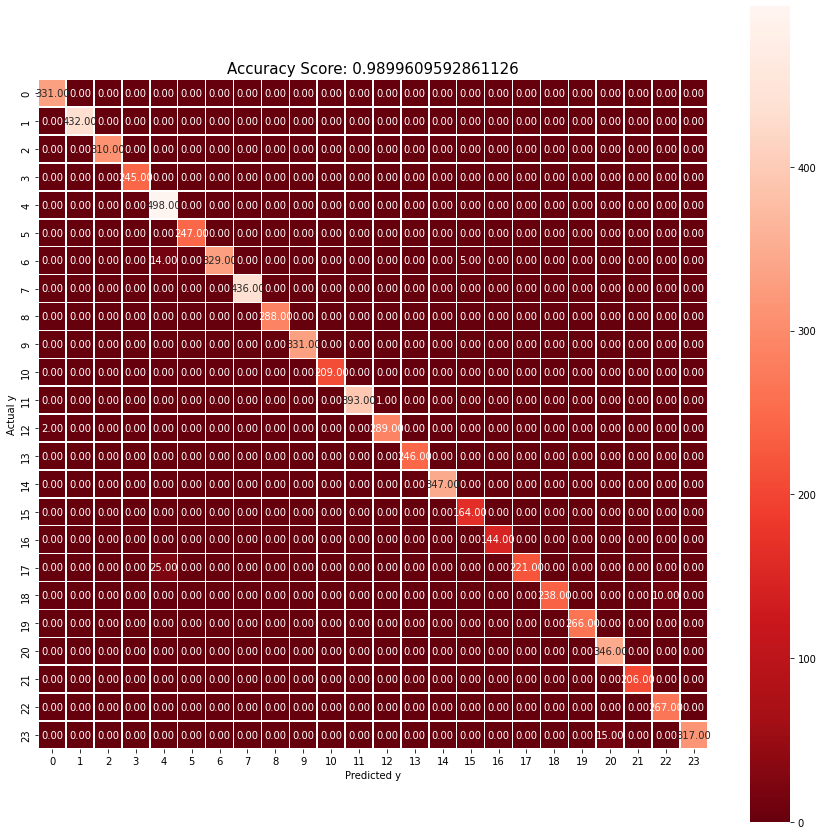

In [30]:
conf_matrix = confusion_matrix(y_true, y_pred)

accuracy = sum(conf_matrix[i][i] for i in range(24)) / y_true.shape[0]

plt.figure(figsize=(15,15))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual y')
plt.xlabel('Predicted y')
plt.title('Accuracy Score: {0}'.format(accuracy), size = 15)

In [31]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.05775762693016342
Test accuracy: 0.98996097
